In [1]:
from modules.config_loader import load_config
from modules.gpt_module import GPTClient
from modules.lora_manager import load_pipe_with_loras
from modules.ad_generator import generate_ad_banner

/home/spai0107/model_dev/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = load_config()
config

{'openai': {'api_key_env': 'OPENAI_API_KEY', 'gpt_model': 'gpt-4.1-mini'},
 'sd_pipeline': {'model_id': 'runwayml/stable-diffusion-v1-5',
  'torch_dtype': 'float16',
  'use_safety_checker': False,
  'device': 'cuda'},
 'lora': {'category_map': {'food': [{'name': 'foodplatters', 'scale': 1.0},
    {'name': 'FoodPorn_v2', 'scale': 0.8},
    {'name': 'meishi', 'scale': 0.6}],
   'cosmetics': [{'name': 'e-commerce_photography02', 'scale': 1.0},
    {'name': 'showcase', 'scale': 0.9}],
   'furniture': [{'name': 'product_design_v3', 'scale': 1.0},
    {'name': 'showcase', 'scale': 0.8}]}},
 'image': {'input_size': [512, 512],
  'output_ratios': {'square': [512, 512],
   'landscape': [912, 512],
   'portrait': [512, 912]},
  'overlay_position': {'square': [120, 360],
   'landscape': [200, 360],
   'portrait': [120, 600]}},
 'generation': {'inference_steps': 40,
  'guidance_scale': 8,
  'negative_prompt': 'logo, text, watermark, blurry, extra fingers'},
 'paths': {'product_image': './images/fo

In [3]:
import os
gpt_client = GPTClient(
    api_key=os.getenv(config["openai"]["api_key_env"]),
    model_name=config['openai']['gpt_model']
)

[2025-07-03 06:09:37] [INFO] [modules.gpt_module] - Initializing GPTClient with model: gpt-4.1-mini


In [4]:
pipe = load_pipe_with_loras(config, "food")
pipe

[2025-07-03 06:09:37] [INFO] [modules.lora_manager] - Loading pipeline with category: food
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 12.31it/s]
[2025-07-03 06:09:45] [INFO] [modules.lora_manager] - Applying LoRAs: ['foodplatters', 'FoodPorn_v2', 'meishi']
/home/spai0107/model_dev/.venv/lib/python3.10/site-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

[2025-07-03 06:09:48] [INFO] [modules.ad_generator] - === Start: Generating advertisement banner ===
[2025-07-03 06:09:48] [INFO] [modules.image_utils] - Encoding image: ./images/food1.jfif to size (512, 512)
[2025-07-03 06:09:48] [INFO] [modules.ad_generator] - Generating ad plan from GPT
[2025-07-03 06:09:48] [DEBUG] [modules.gpt_module] - Sending chat message to OpenAI
[2025-07-03 06:09:55] [DEBUG] [modules.gpt_module] - Received response from OpenAI
[2025-07-03 06:09:55] [DEBUG] [modules.ad_generator] - Ad plan:
광고 배너 기획안

톤: 따뜻하고 정감 있는 분위기, 한국 전통 음식의 진한 맛과 정성을 느낄 수 있도록 자연스럽고 포근한 느낌 강조

배경: 다크 네이비 블루 계열의 배경으로 음식의 빨간색과 노란색이 더욱 돋보이게 하여 시선을 집중. 배경은 무광질감이나 약간의 텍스처를 넣어 고급스럽지만 방해되지 않도록 깔끔하게 연출.

레이아웃: 
- 중앙에 음식을 위에서 바라본 클로즈업 샷 배치 
- 상단 또는 하단에 간결한 브랜드 로고 배치
- 이미지의 왼쪽 또는 오른쪽 여백에 짧고 임팩트 있는 카피 삽입

배너 카피 제안: 
- "한국의 깊은 맛, 집에서 즐기세요"
- "한 그릇의 진심, 따끈한 집밥"
- "따끈따끈 얼큰한 행복 한 그릇"

전체적으로 단순하면서도 한국 음식 본연의 맛과 따뜻한 분위기를 효과적으로 전달하는 배너 디자인을 목표로 합니다.
[2025-07-03 06:09:55] [INFO] [modules.ad_generator] - Con

[INFO] Saved square banner: ./out/final_square.png
[INFO] Saved landscape banner: ./out/final_landscape.png
[INFO] Saved portrait banner: ./out/final_portrait.png


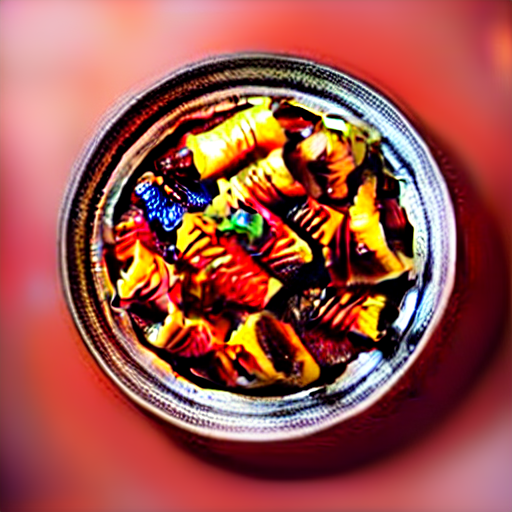

In [5]:
generate_ad_banner(config, gpt_client, pipe)

Debug initial generated image


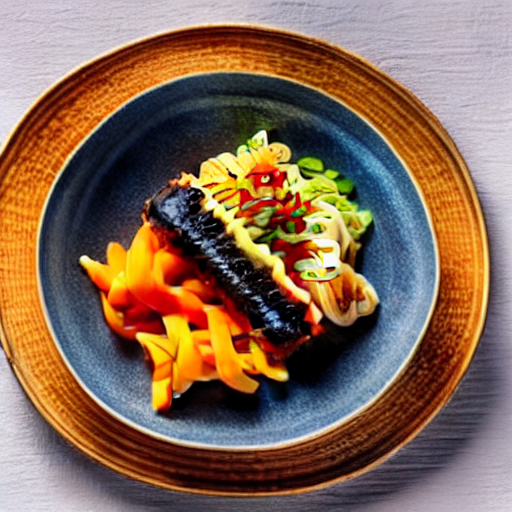

In [6]:
from PIL import Image
print("Debug initial generated image")
Image.open('debug_output.png')

Ip Adapter generated image


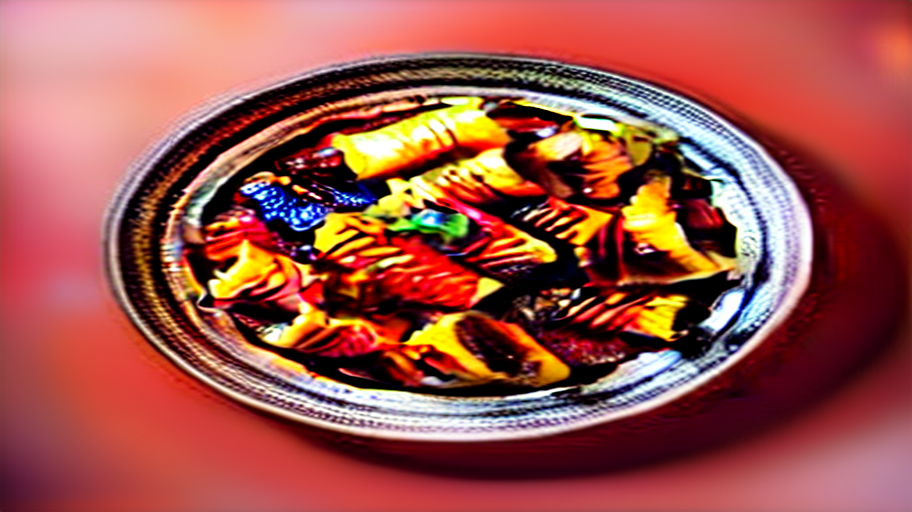

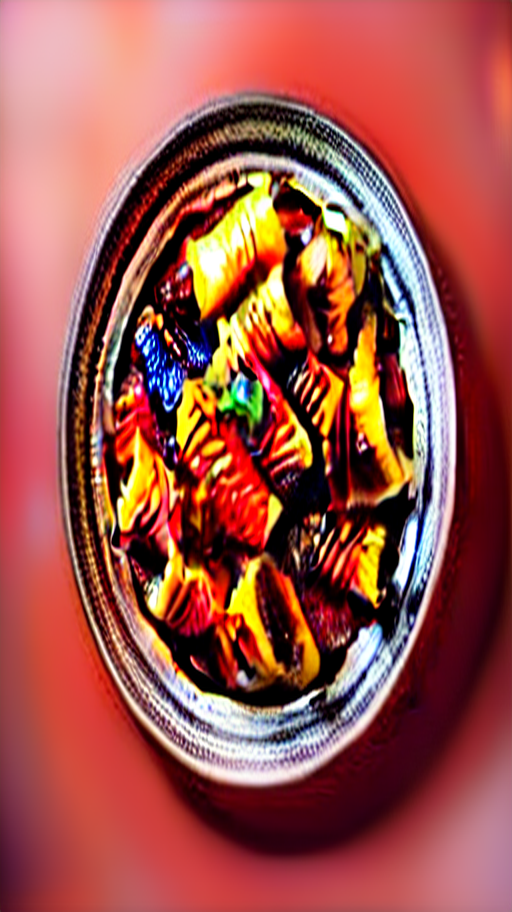

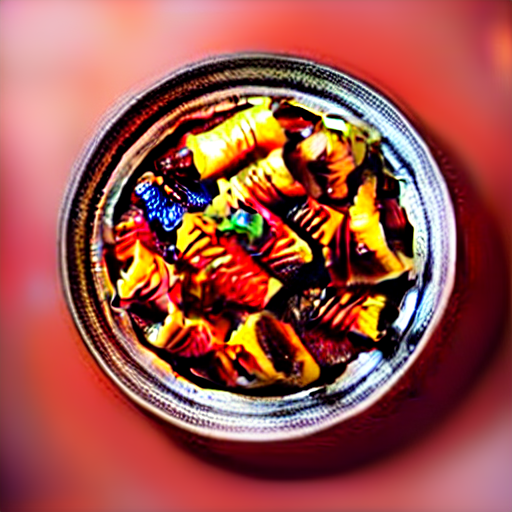

In [7]:
print("Ip Adapter generated image")
display(Image.open('out/final_landscape.png'))
display(Image.open('out/final_portrait.png'))
display(Image.open('out/final_square.png'))
